In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.special import jv

In [19]:
year = 3.1536e7               #Seconds in a year
M_sun = 1.9891e30             #Mass of sun in kg
G = 6.6743e-11                #gravitational constant in m^3/kg/s^2
c = 299792458                 #speed in m/s
D = 3.086e22                  #Distance in meters (1 Mpc)
#m1 = 0.5 * M_sun              #Mass of WD1 in kg
#m2 = 0.5 * M_sun              #Mass of WD2 in kg
#mu = (m1 * m2)/(m1 + m2)      #Reduced Mass of system in kg
#M = m1 + m2                   #Total mass of system in kg
mu = 10 * M_sun
M = (10**6) * M_sun
#D = 6 * ((2*G*M)/(c**2))

e0 = 0.1                     #LSO eccentricity (unitless)
nu0 = 0.00206                #LSO orbital frequency (1/seconds)

In [20]:
def dnudt(e0):
    dnudt = (96/(10*np.pi))*(((c**6)*mu)/((M**3)*(G**2)))*((2*np.pi*(G*M/(c**3)*nu0))**(11/3))*((1-(e0**2))**(-9/2))*((1+((73/24)*(e0**2))+((37/96)*(e0**4)))*(1-(e0**2)))
    return dnudt

def dedt(e0):
    dedt = -1*(e0/15)*(((c**3)*mu)/((M**2)*G))*((1-(e0**2))**(-7/2))*((2*np.pi*(G*M/(c**3)*nu0))**(8/3))*((304+(121*(e0**2)))*(1-(e0**2)))
    return dedt

In [21]:
dnudt0 = dnudt(e0)
dedt0 = dedt(e0)

t_M = (G * M)/(c**3)        #Characteristic length scale of M in seconds
t_char = nu0/dnudt0         #Characteristic timescale in seconds

A0 = t_M * nu0              #Reletavistic Quantity maybe (unitless)

t0 = 0                      #Start time (unitless)
tf = (-10 * year)/t_char      #End time (unitless)

In [22]:
initial_conditions = np.array([A0, e0])

In [23]:
def coupled_odes(t, y):
    A, e = y
    
    dAdt  = (96/(10*np.pi))*((t_char/t_M)*(mu/M))*((2*np.pi*A)**(11/3))*((1-(e**2))**(-9/2))*((1+((73/24)*(e**2))+((37/96)*(e**4)))*(1-(e**2)))
    
    dedt = -1*(e/15)*((t_char/t_M)*(mu/M))*((1-(e**2))**(-7/2))*((2*np.pi*A)**(8/3))*((304+(121*(e**2)))*(1-(e**2)))
    
    return [dAdt, dedt]

In [24]:
t_span = np.array([t0, tf])
times = np.linspace(t0,tf,1000)

In [25]:
solution = solve_ivp(coupled_odes, t_span, initial_conditions, t_eval=times)

t = solution.t
nu = solution.y[0]
e = solution.y[1]

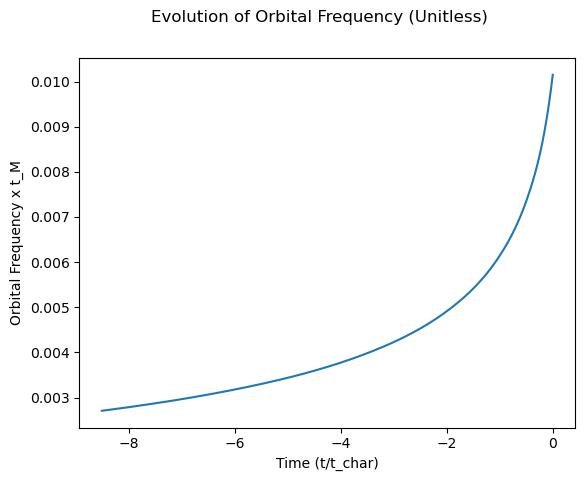

In [26]:
plt.plot(t, nu)
plt.suptitle('Evolution of Orbital Frequency (Unitless)')
plt.xlabel('Time (t/t_char)')
plt.ylabel('Orbital Frequency x t_M')
plt.show()

In [27]:
def g(n):
    g = ((n**4)/32)*((((jv(n-2,(n*e)))-(2*e*(jv(n-1,(n*e))))+((2/n)*(jv(n,(n*e))))+(2*e*(jv(n+1,(n*e))))-((jv(n+2,(n*e)))))**2)+(((1-(e**2))*((jv(n-2,(n*e)))-(2*(jv(n,(n*e)))+(jv(n+2,(n*e))))))**2)+((4/(3*(n**2)))*(((jv(n,(n*e))))**2)))
    return g

In [28]:
dnudt  = (96/(10*np.pi))*((t_char/t_M)*(mu/M))*((2*np.pi*nu)**(11/3))*((1-(e**2))**(-9/2))*((1+((73/24)*(e**2))+((37/96)*(e**4)))*(1-(e**2)))

In [29]:
def fdot(n):
    fdot = n * dnudt
    return fdot

In [30]:
def f(n):
    f = n*nu
    return f

In [31]:
def Edot(n):
    Edot = (32/5)*((G**(7/3))/(c**5))*(mu**2)*(M**(4/3))*((2*np.pi*nu)**(10/3))*g(n)
    return Edot

In [32]:
def h(n):
    h = (((G**(1/2))/(c**(3/2)))*(np.sqrt((2*Edot(n))/fdot(n))))/(np.pi*D)
    return h

def h2(n):
    h2 = (h(n))**2
    return h2

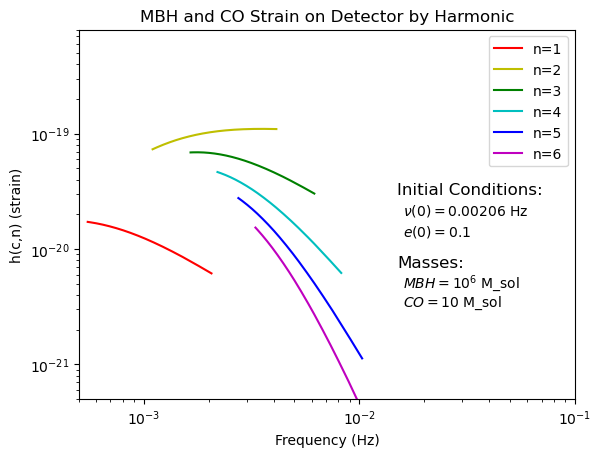

In [40]:
plt.plot(f(1)/t_M, h(1), 'r-', label='n=1')
plt.plot(f(2)/t_M, h(2), 'y-', label='n=2')
plt.plot(f(3)/t_M, h(3), 'g-', label='n=3')
plt.plot(f(4)/t_M, h(4), 'c-', label='n=4')
plt.plot(f(5)/t_M, h(5), 'b-', label='n=5')
plt.plot(f(6)/t_M, h(6), 'm-', label='n=6')
plt.title('MBH and CO Strain on Detector by Harmonic')
plt.xlabel('Frequency (Hz)')
plt.ylabel('h(c,n) (strain)')
plt.xlim(5e-4,1e-1)
plt.ylim(5e-22, 8e-19)
plt.text(1.5e-2, 3e-20, 'Initial Conditions:', fontsize = 12)
plt.text(1.6e-2, 2e-20, r'$\nu (0) = 0.00206$ Hz', fontsize = 10)
plt.text(1.6e-2, 1.3e-20, r'$e (0) = 0.1$', fontsize = 10)
plt.text(1.5e-2, 7e-21, 'Masses:', fontsize = 12)
plt.text(1.6e-2, 4.7e-21, r'$MBH = 10^6$ M_sol', fontsize = 10)
plt.text(1.6e-2, 3.2e-21, r'$CO = 10$ M_sol', fontsize = 10)
plt.legend()
plt.semilogy()
plt.semilogx()
plt.show()

In [17]:
print(mu/M)                    #Mass ratio
print(e[0])                    #Initial eccentiricty
#print(e[-1])                  #Our final eccentricity
#print(e[-1]/0.378)            #Our final eccentricity divided by figure 12 final eccentricity (null)
print(nu[0]/t_M)               #Initial nu
print(nu[-1]/t_M)              #Our final nu
print((nu[-1]/t_M)/0.00058)    #Our final nu divided by figure 12 final nu (within 12%)

9.999999999999999e-06
0.1
0.00206
0.0005492011125238499
0.9468984698687066
